# クラスの仕組み

いろいろなプログラム言語でサポートされているクラスについて説明します。

## クラスの機能

クラスには主に以下の機能が備わっています。

1. インスタンス変数を持つことが出来る
2. インスタンスメソッドを持つことが出来る
3. 継承することが出来る
4. 継承先でインスタンスメソッドをオーバライドできる
5. クラス変数（static変数）を持つことが出来る
6. クラスメソッド（staticメソッド）を持つことが出来る
7. 変数やメソッドのアクセス範囲を決めることが出来る

上記機能は、主に以下の目的で具備されています。

- カプセル化
  - 関連性の強いデータ群と処理をクラスにまとめることで、分かりやすく実装分担できるメリットがある
  - クラス内の処理だけに必要な変数やメソッドと、外部で使ってもらいたい変数やメソッドに適切なアクセス権を付けることで、誤った使い方を抑止できる
  - 前述の1. 2. 5. 6. 7. などが該当する
- 継承
  - 共通的な機能を基底クラスにまとめて、個別機能を派生クラスで定義するなどの効率化がやりやすい
  - 基本的な枠組みを基底クラスで作成し、実動作を派生クラスに任せるなど分担することで、実装がやりやすくなる
  - 前述の3. 4.　などが該当する
- ポリモーフィズム
  - 基底クラスのメソッドをオーバーライドし、別の振る舞いに変更できる
  - 前述の4. が該当する

## クラスの種類

プログラム言語によって異なりますが、以下のようなクラスの種類が存在します。

- interface
  - 実装すべき振る舞いだけ定義したクラス
  - Javaでサポートされており、Java8からはメソッドのデフォルト実装も出来るようになったが、基本的には継承（実装）したクラスで実処理を記載する
  - C++でも全てのメソッドを空実装（`virtual xxx func(yyy) = 0`）とすることで同じようなことを実現可能
- class
  - 標準的なクラス定義
- abstract class
  - このクラス自体には未実装があるため、必ず継承して不足分を実装する必要があるクラス
- final class
  - 継承を許可しないクラス

上記を適切に使えるようになれば、オブジェクト指向プログラミングが身に付いたと言えるでしょう。

## プログラム言語ごとのクラスの仕組み

クラス定義をどのように取り扱うかは、プログラム言語によって違いがあります。  
特にコンパイラ言語であるC++/Javaと、インタプリタ言語であるPython/TypeScriptで大きく概念が分かれます。  
（TypeScriptはJavaScriptへトランスパイルしますが、最終的にはインタプリタであるJavaScriptで動くため、インタプリタとしています）

### コンパイラ言語でのクラスの仕組み

コンパイラ言語では、プログラムで記述したクラス定義は、コンパイル後および実行時には主にクラスの定義情報とインスタンス化したオブジェクト情報に分かれます。

- クラスの定義情報
  - クラスがどのような変数やメソッドを持っているかの情報
  - クラスがどのクラスを継承しているかの情報
  - メソッドの実装内容
- インスタンス化したオブジェクト情報
  - インスタンス変数の情報
  - どのクラスとしてインスタンス化されたかの情報

以下のJavaクラスを例にしてみます。

```java
public class Point {
    private int x;
    private int y;
    
    public Point() {
    }
    public Point(int x, int y) {
        this.x = x;
        this.y = y;
    }
    public int getX() {
        return this.x;
    }
    public int getY() {
        return this.y;
    }
}
```

- クラス定義情報（コンパイル後の .class ファイルに情報が集約される）
  - Pointクラスには x, y という int のインスタンス変数がある
  - Pointクラスには2つのコンストラクタと getX(), getY() というメソッドがある
  - 継承元はデフォルトのObjectクラス
  - コンストラクタやgetX(), getY() の実装内容が .class ファイルに保存される
- インスタンス化したオブジェクト情報
  - インスタンス化したオブジェクトごとに、インスタンス変数である x, y の値を保持している
  - インスタンス化（new）した際のクラス（通常はPointクラス）の情報を保持している（Object.getClass()で取得可能）

```java
Point pt = new Point(3, 4);
pt.getX();
```

例えば上記のプログラムが動く過程は以下のイメージとなる。

1. `new Point(3, 4)`
  1. Pointクラスに必要なメモリが確保されたJavaオブジェクト（インスタンス）が作成される
  2. そのインスタンス化したクラスとして Point が設定される
  3. thisにこのインスタンスを設定して、クラス定義情報にあるPointクラスのコンストラクタを呼び出す
2. `pt.getX()`
  1. ptをインスタンス化したクラス情報を取得する
  2. そのクラス情報から getX() のメソッドを探す
  3. thisにptを設定して getX() を呼び出す

このように、インスタンスに保持されている情報と、クラス定義情報を行き来しながら処理は進んでいきます。

C++の場合は少し異なります。

```c++
class Point {
    int x;
    int y;
public:
    Point():x(0), y(0) {
    }
    Point(int x, int y): x(x), y(y) {
    }
    int getX() {
        return this.x;
    }
    int getY() {
        return this.y;
    }
};
```

- クラス定義情報
  - コンパイル後の情報には、x, y という変数名は存在しない
  - コンストラクタやgetX(), getY() のメソッド処理は作成される
- インスタンス化したオブジェクトの情報
  - インスタンス変数である x, y の値を保持している
  - インスタンス化した際のクラス情報は持っていない

```
Point* pt = new Point(3, 4);
pt->getX();
```

1. `new Point(3, 4)`
  1. Pointクラスに必要なメモリが確保される
  2. thisに上記メモリを設定し、Pointクラスのコンストラクタを呼び出す
2. `pt->getX()`
  1. thisにptを設定する
  2. コンパイル時点で pt が Point* であることが分かるため、Point::getX() を呼び出す

上記は virtual メソッドがない場合の動きとなります。  

#### C++でvirtualメソッドが存在するクラスの動き

普通はこのようなクラス設計はしませんが、分かりやすくするために以下の3つのクラス定義を例にします。

```c++
class Point {
    int x;
    int y;
public:
    Point():x(0), y(0) {
    }
    Point(int x, int y): x(x), y(y) {
    }
    int getX() {
        return this.x;
    }
    int getY() {
        return this.y;
    }
};

class Rectangle: public Point {
    int width;
    int height;
public:
    Rectangle(): Point(), width(0), height(0) {
    }
    Rectangle(int x, int y, int width, int height): Point(x, y), width(width), height(height) {
    }
    virtual int getWidth() {
        return this.width;
    }
    virtual int getHeight() {
        return this.height;
    }
};

class DummyRectangle: public Rectangle {
public:
    // コンストラクタは省略
    virtual int getWidth() {
        return getHeight();
    }
    virtual int getRealWidth() {
        return Rectangle::getWidth();
    }
};
```

上記は Point クラスには virtual メソッドがないですが、Rectangle, DummyRectangleには virtual メソッドがあります。  
これによって、Rectangle, DummyRectangle のクラス定義情報は以下へと変わります。

- クラス定義情報
  - コンパイル後の情報には、x, y, width, height という変数名は存在しない
  - コンストラクタやgetX(), getY(), getWidth(), getHeight(), getRealWidth() のメソッド処理は作成される
  - virtualメソッド用の仮想メソッドテーブル（vtable）が Rectangle と DummyRectangle それぞれに作成される
- インスタンス化したオブジェクトの情報
  - インスタンス変数である x, y, width, height の値を保持している
  - インスタンス化した際の仮想メソッドテーブルへのポインタを保持している

上記のクラスについて、以下のようにインスタンス化してみます。

```c++
Rectangle* obj = new Rectangle();
Point* base = obj;
DummyRectangle* obj2 = new DummyRectangle();
Rectangle* obj3 = obj2;
```

これによって以下のようなメモリイメージとなります。

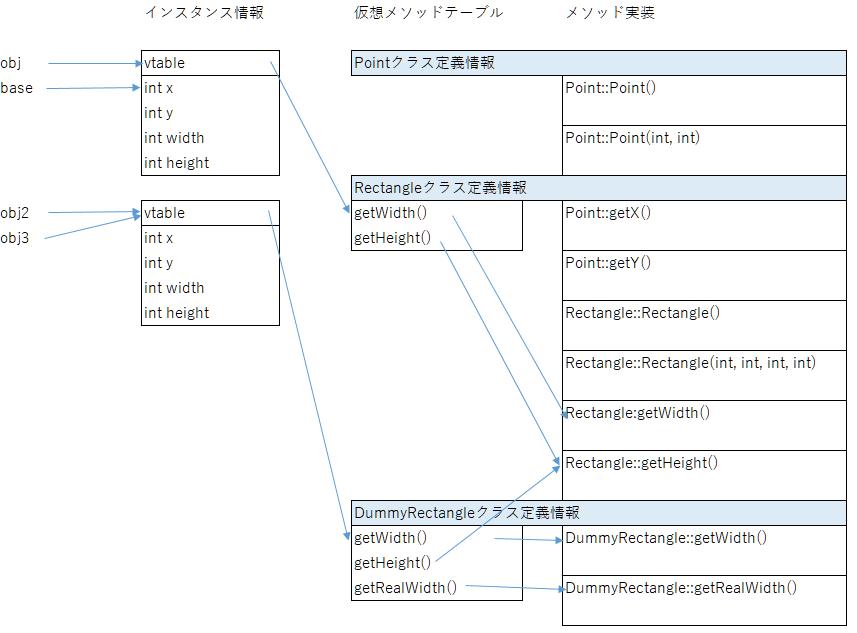

virtualメソッドを持っているクラス、あるいは virtual メソッドを持っているクラスを継承したクラス（自身に virtual メソッドがなくても）には vtable と呼ばれる仮想メソッドテーブルがクラス定義情報の一部として作成されます。  
そして new する際には、インスタンスが示すメモリの先頭に、このvtableへの参照ポインタが保持されます。  
virtualメソッドを呼び出す際には、指定したインスタンスの先頭の vtable を参照し、その先のメソッドを呼び出します。

```c++
obj->getWidth();
```

1. objが vtable を持つ Rectangle クラスだと分かる
2. getWidth()は vtable の0番目なので、thisにobjを設定し、objが示すvtableの0番目のメソッドを呼び出す

obj2 や obj3 の vtable は DummyRectangle クラスのものとなっているため、`obj2->getWidth()`と実行した場合は、vtableの0番目のDummyRectangle::getWidth()が呼び出されます。  
これによって、オーバーライドが実現されています。

**C++のポインタ周りで、もう一つ重要なことがあります。**

```c++
Point* base = obj;
```

上記はポインタ同士の代入ですが、base と obj は別アドレスを示しています。  
それは Point クラスには vtable がないため、Point* base には vtable をスキップした実体のアドレスが設定されるためです。

逆に以下のように継承した先へキャストした場合は、vtable分アドレスを引き算して設定されます。

```c++
Rectangle* rect = (Rectangle*)base;
```

また、Rectangle* obj を使って、Point::getX() を呼び出した際は以下のようになります。

1. objが vtable を持つ Rectangle クラスだと分かる
2. getX()は vtable を持たない Point クラスのメソッドなので、thisにはobjにvtableをスキップしたアドレスを設定し、Point::getX()を呼び出す

このように、クラスのポインタ同士の代入やメソッド呼び出しでは、vtableがあるかないかをコンパイラが判断して、アドレスの増減を行う処理が追加されています。  
そのため、以下のようにコンパイラが判断できないようなプログラムを書くと、落ちる原因となります。

```c++
Rectangle* rect = (Rectangle*)(void*)base;
```

これは、いったん void* に変換しているため、どのクラス同士の変換かが分からなくなり、コンパイラはアドレスの増減を行わなくなるためです。

### インタプリタ言語でのクラスの仕組み

コンパイラ言語は、コンパイル結果としてのクラス定義情報と、実行時に作成されるインスタンス情報に分かれていることを説明しました。  
逆にインタプリタ言語では、コンパイルという概念がないために、実行時にクラス情報などが作成されます。

インタプリタ言語では、変数定義で型を指定するという概念はほぼなく、変数に何が入っているかは実行してみないと分からない、逆に変数に何を入れてもよいものが多いです。  
また、変数には汎用的なオブジェクトを代入することができ、そのオブジェクトには後から属性やメソッドを追加できるようになっています。

クラス定義もこの汎用的なオブジェクトをうまく使うように実装されています。

例えば python で以下のクラスを作ったとします。

```python
class Point():
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    def getX(self):
        return self.x;
    def getY(self):
        return self.y;
```

上記クラスを使う時は以下のようなコードを書きます。

```python
pt = Point()
pt.getX()
```

インタプリタ言語では、このクラス定義もオブジェクト（関数オブジェクトも含む）として保持される実装が多くなっています。

以下はイメージですが、少しは理解しやすくなるかと思います。

```python
# クラスの中のメソッドが展開される（以下の文法はないが、こんなイメージ）
def Point.__init__(self, x = 0, y = 0):
    self.x = x
    self.y = y
def Point.getX(self):
    return self.x;
def Point.getY(self):
    return self.y;

def Point(x = 0, y = 0):
    ret = Object()  # こんな文法はないが、汎用オブジェクトを作るというイメージ
    Point.__init__(ret, x, y) # コンストラクタを呼ぶ
    # 以下のような文法はないが、汎用オブジェクトにメソッドを追加しているというイメージ
    ret.getX() = Point.getX(ret)
    ret.getY() = Point.getY(ret)
    return ret  # 作成したインスタンスを返す
```

上記のようにクラス定義がオブジェクト化（関数オブジェクトのようなもの）されて使えるようになります。

このようなインタプリタ言語では、クラスの継承によるオーバーライドとは、この汎用オブジェクトに追加したメソッドを、派生クラスのメソッドで書き換えることで実現されます。